<a href="https://colab.research.google.com/github/Triveni283/ExcelR-Assignment/blob/main/SVM_Salary_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

In [7]:
# Importing Training and Testing Dataset
salary_train_df = pd.read_csv('SalaryData_Train.csv')
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
salary_test_df = pd.read_csv('SalaryData_Test.csv')
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [10]:
# Merging Train and Test Data
raw_data = pd.concat([salary_train_df, salary_test_df])
raw_data.reset_index(inplace=True, drop=True)
raw_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [11]:
#Data Exploration
#Descriptive Statistics
raw_data.describe()
raw_data.info()
#Missing Values
raw_data.isnull().sum()
#Duplicated Values
raw_data.duplicated().sum()
#columns
raw_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [12]:
#Numerical Variables
# List of Numerical Variables
numerical_features=[feature for feature in raw_data.columns if raw_data[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))

Number of numerical variables: 5


In [13]:
# Visualize the numerical variables
raw_data[numerical_features].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [14]:
#Discrete Feature
discrete_feature=[feature for feature in numerical_features if len(raw_data[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 1


In [15]:
#Continuous Variable
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 4


In [16]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

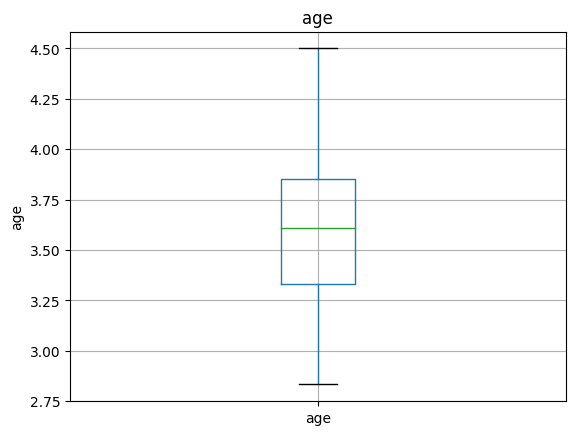

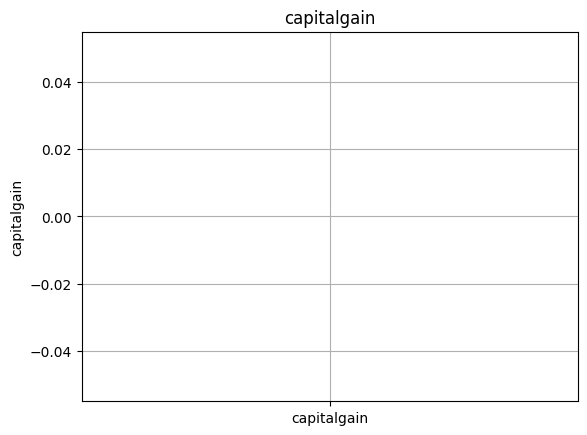

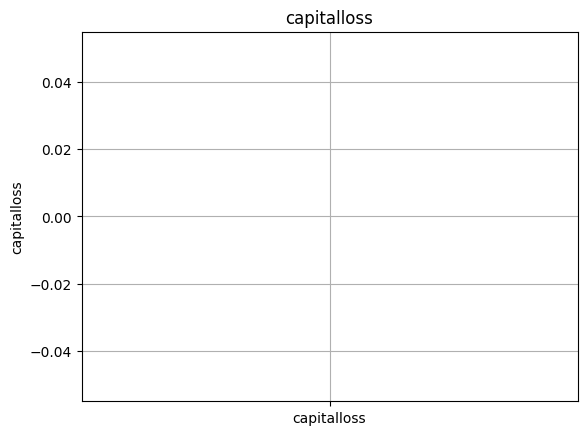

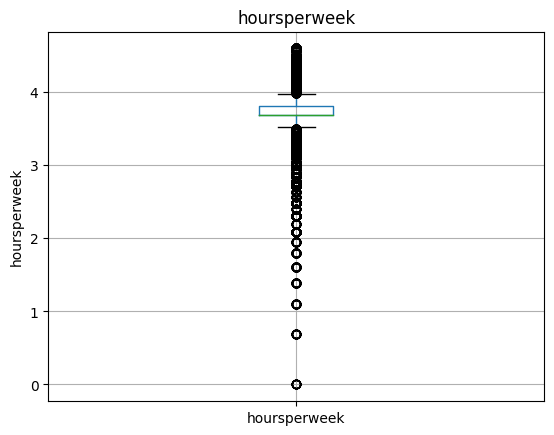

In [19]:
#After Log-Transformation
for feature in continuous_feature:
    data=raw_data.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

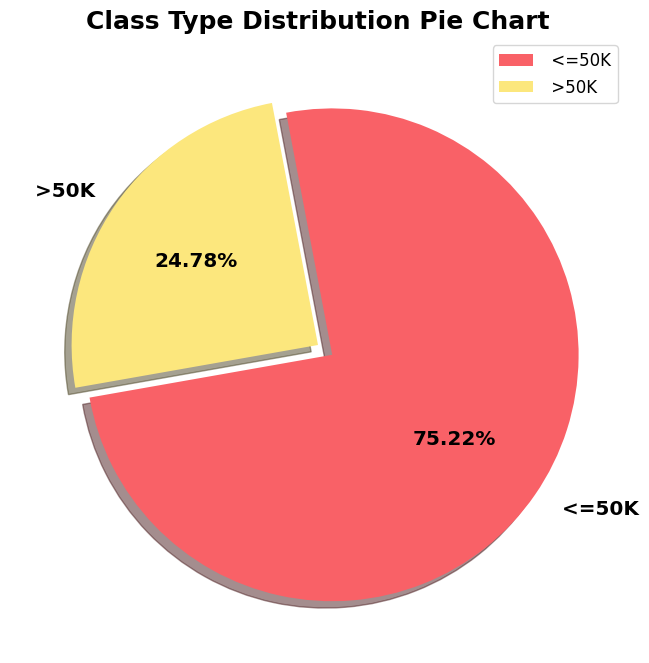

In [48]:
plt.figure(figsize = (12,8))
plt.pie(raw_data['Salary'].value_counts(),
       labels=raw_data.Salary.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
        colors = ["#F96167", "#FCE77D"],
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

In [21]:
#Data Pre-Processing
#Label Encoding Technique
from sklearn import preprocessing

In [22]:
# label_encoder object knows how to understand word labels.
df= raw_data.copy()
label_encoder = preprocessing.LabelEncoder()
df["education"]=label_encoder.fit_transform(df["education"])
df["workclass"]=label_encoder.fit_transform(df["workclass"])
df["maritalstatus"]=label_encoder.fit_transform(df["maritalstatus"])
df["sex"]=label_encoder.fit_transform(df["sex"])
df["race"]=label_encoder.fit_transform(df["race"])
df["occupation"]=label_encoder.fit_transform(df["occupation"])
df["relationship"]=label_encoder.fit_transform(df["relationship"])
df["native"]=label_encoder.fit_transform(df["native"])

In [23]:
df.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
5,37,2,12,14,2,3,5,4,0,0,0,40,37,<=50K
6,49,2,6,5,3,7,1,2,0,0,0,16,21,<=50K
7,52,4,11,9,2,3,0,4,1,0,0,45,37,>50K
8,31,2,12,14,4,9,1,4,0,14084,0,50,37,>50K
9,42,2,9,13,2,3,0,4,1,5178,0,40,37,>50K


In [24]:
df['Salary'] = raw_data.Salary
df['Salary'] = np.where(df['Salary'].str.contains(" >50K"), 1, 0)
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [25]:
#Applying Standard Scaler
df[continuous_feature]

,age,capitalgain,capitalloss,hoursperweek
0,39,2174,0,40
1,50,0,0,13
2,38,0,0,40
3,53,0,0,40
4,28,0,0,40
...,...,...,...,...
45216,33,0,0,40
45217,39,0,0,36
45218,38,0,0,50
45219,44,5455,0,40


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = df[continuous_feature]
df[continuous_feature] = scaler.fit_transform(features.values)
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.034190,5,9,13,4,0,1,4,1,0.142884,-0.218728,-0.078121,37,0
1,0.866399,4,9,13,2,3,0,4,1,-0.146735,-0.218728,-2.326714,37,0
2,-0.041466,2,11,9,0,5,1,4,1,-0.146735,-0.218728,-0.078121,37,0
3,1.093365,2,1,7,2,5,0,2,1,-0.146735,-0.218728,-0.078121,37,0
4,-0.798019,2,9,13,2,9,5,2,0,-0.146735,-0.218728,-0.078121,4,0


In [27]:
#Test Train Split With Imbalanced Dataset
x = df.drop('Salary',axis=1)
y = df['Salary']

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)


In [29]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (31654, 13)
Shape of X_test:  (13567, 13)
Shape of y_train:  (31654,)
Shape of y_test (13567,)


In [30]:
#### Support Vector classifier
### Kernal='linear'
from sklearn.svm import SVC
clf = SVC(kernel='linear',C=5.0)
clf.fit(x_train, y_train)


SVC(C=5.0, kernel='linear')

In [31]:
### Y predictions
Y_pred_train = clf.predict(x_train)
Y_pred_test  = clf.predict(x_test)

In [32]:
### accuracy score
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(y_train, Y_pred_train)
print("Training Accuracy score:", (ac1*100).round(2))
ac2 = accuracy_score(y_test, Y_pred_test)
print("Test Accuracy score:", (ac2*100).round(2))
print('Variaance between test and train accuracy',(ac1-ac2).round(2))

from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score


Training Accuracy score: 80.94
Test Accuracy score: 80.9
Variaance between test and train accuracy 0.0


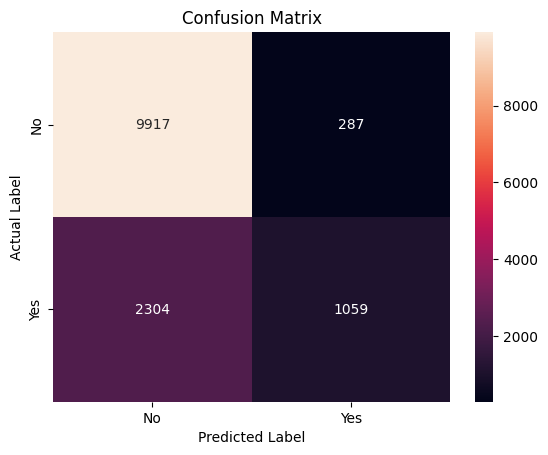

In [33]:
# plot confusion matrix to describe the performance of classifier.
cm_df=cm(y_test, Y_pred_test)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

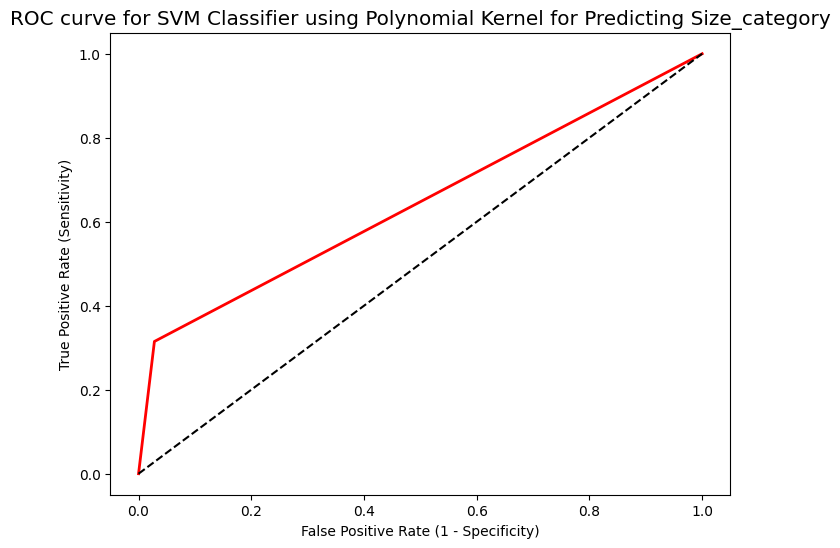

ROC AUC : 0.6434


In [34]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, Y_pred_test)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, color='red')
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier using Polynomial Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
ROC_AUC = roc_auc_score(y_test,Y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

In [37]:
#Support Vector classifier
#Kernal='Poly
from sklearn.svm import SVC
clf = SVC(kernel='poly',degree=5)
clf.fit(x_train, y_train)

SVC(degree=5, kernel='poly')

In [38]:
### Y prediictions
Y_pred_train = clf.predict(x_train)
Y_pred_test  = clf.predict(x_test)

### accuracy score
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(y_train, Y_pred_train)
print("Training Accuracy score:", (ac1*100).round(2))
ac2 = accuracy_score(y_test, Y_pred_test)
print("Test Accuracy score:", (ac2*100).round(2))
print('Variaance between test and train accuracy',(ac1-ac2).round(2))


Training Accuracy score: 82.92
Test Accuracy score: 82.69
Variaance between test and train accuracy 0.0


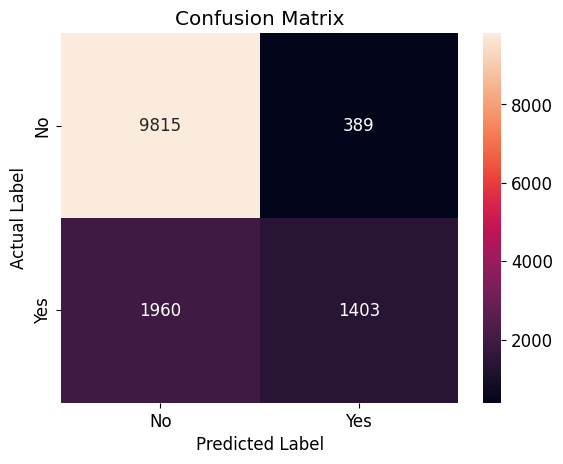

In [39]:
# plot confusion matrix to describe the performance of classifier.
cm_df=cm(y_test, Y_pred_test)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


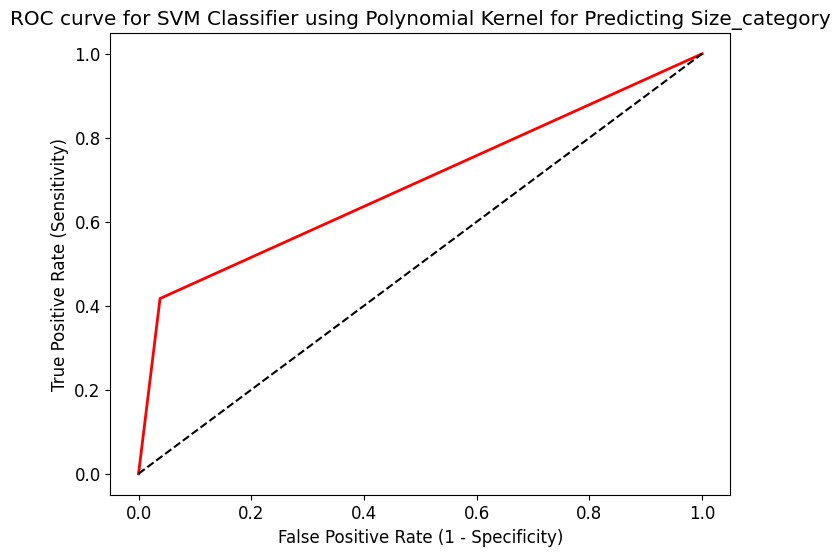

ROC AUC : 0.6895


In [40]:
#ROC Curve
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score
fpr, tpr, thresholds = roc_curve(y_test, Y_pred_test)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, color='red')
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier using Polynomial Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
ROC_AUC = roc_auc_score(y_test,Y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))


In [41]:
#### Support Vector classifier
### Kernal=rbf
from sklearn.svm import SVC
clf = SVC(kernel='rbf',gamma='scale')
clf.fit(x_train, y_train)

SVC()

In [42]:
### Y predictions
Y_pred_train = clf.predict(x_train)
Y_pred_test  = clf.predict(x_test)

# accuracy score
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(y_train, Y_pred_train)
print("Training Accuracy score:", (ac1*100).round(2))
ac2 = accuracy_score(y_test, Y_pred_test)
print("Test Accuracy score:", (ac2*100).round(2))
print('Variaance between test and train accuracy',(ac1-ac2).round(2))

Training Accuracy score: 81.44
Test Accuracy score: 81.51
Variaance between test and train accuracy -0.0


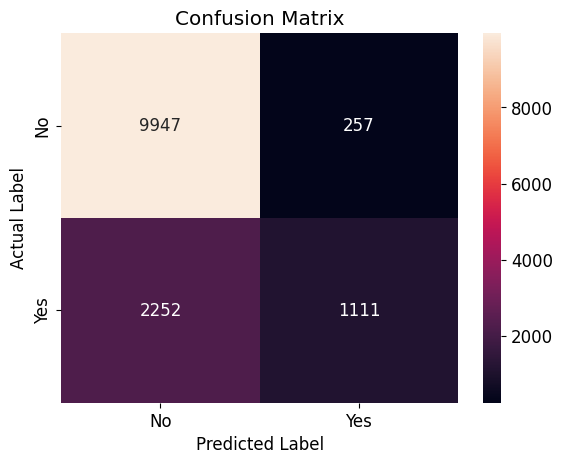

In [43]:
# plot confusion matrix to describe the performance of classifier.
cm_df=cm(y_test, Y_pred_test)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

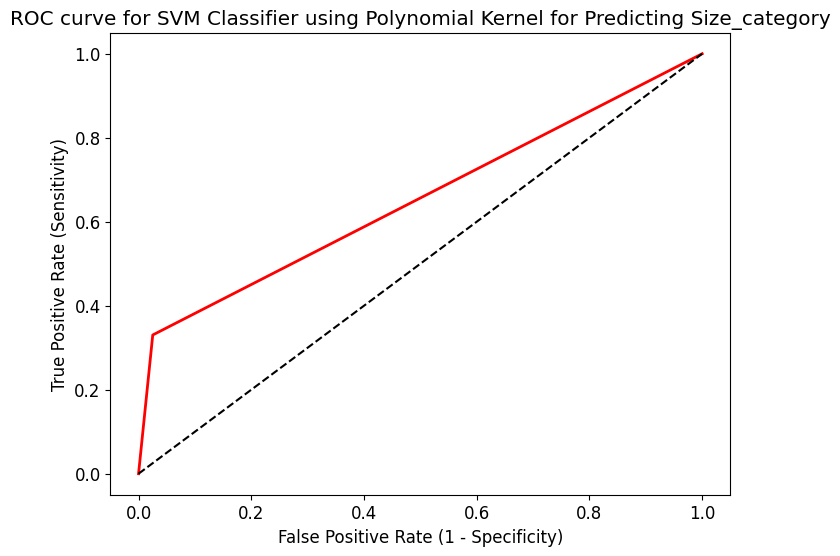

ROC AUC : 0.6526


In [44]:
#ROC Curve
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score
fpr, tpr, thresholds = roc_curve(y_test, Y_pred_test)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, color='red')
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier using Polynomial Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
ROC_AUC = roc_auc_score(y_test,Y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))


In [45]:
#### Support Vector classifier
### Kernal= sigmoid
from sklearn.svm import SVC
clf = SVC(kernel='sigmoid',gamma='scale')
clf.fit(x_train, y_train)

### Y predictions
Y_pred_train = clf.predict(x_train)
Y_pred_test  = clf.predict(x_test)

# accuracy score
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(y_train, Y_pred_train)
print("Training Accuracy score:", (ac1*100).round(2))
ac2 = accuracy_score(y_test, Y_pred_test)
print("Test Accuracy score:", (ac2*100).round(2))
print('Variaance between test and train accuracy',(ac1-ac2).round(2))


Training Accuracy score: 78.31
Test Accuracy score: 78.31
Variaance between test and train accuracy -0.0


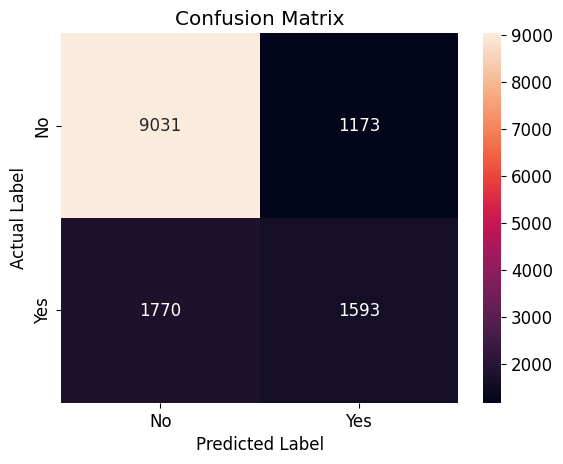

In [46]:
# plot confusion matrix to describe the performance of classifier.
cm_df=cm(y_test, Y_pred_test)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

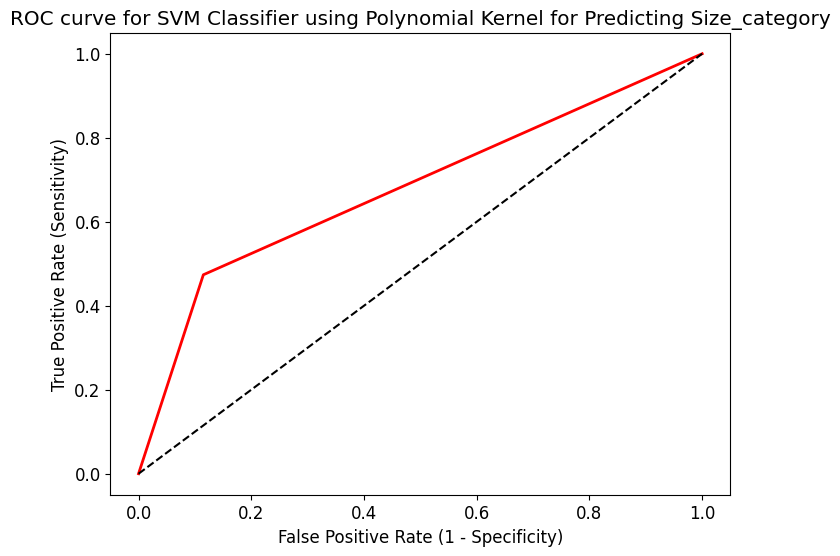

ROC AUC : 0.6794


In [47]:
#ROC Curve
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score
fpr, tpr, thresholds = roc_curve(y_test, Y_pred_test)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, color='red')
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier using Polynomial Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
ROC_AUC = roc_auc_score(y_test,Y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))